In [1]:
import pandas as pd
import numpy as np


train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

ID = test_data["PassengerId"]

In [2]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

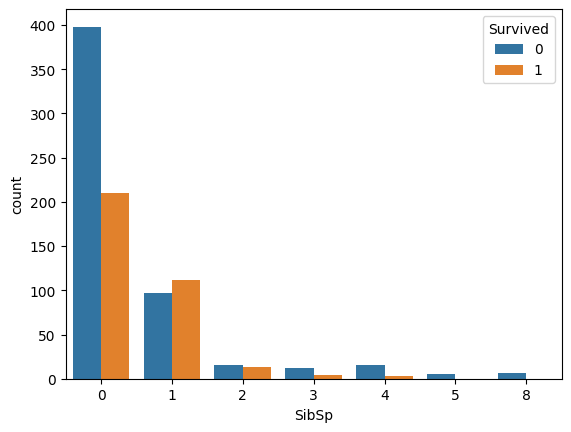

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="SibSp", hue="Survived", data=train_data)
plt.show()

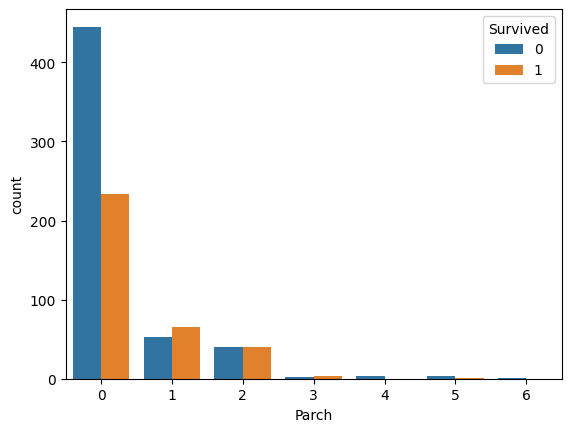

In [4]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.show()

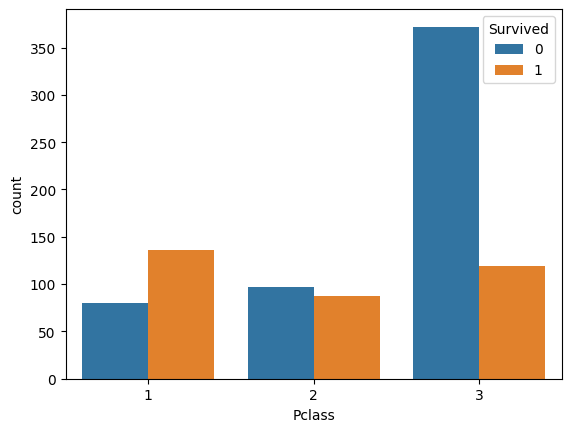

In [5]:
sns.countplot(x="Pclass", hue="Survived", data=train_data)
plt.show()

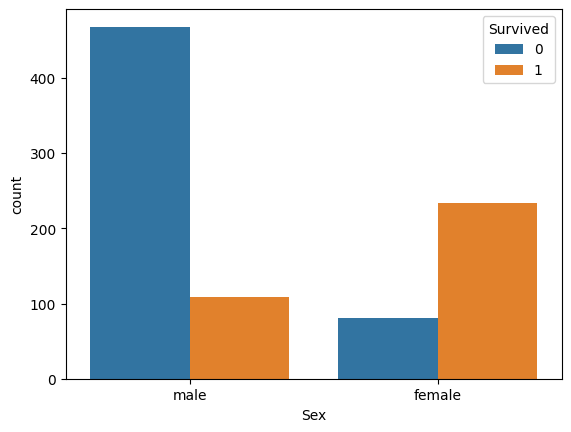

In [6]:
sns.countplot(x="Sex", hue="Survived", data=train_data)
plt.show()

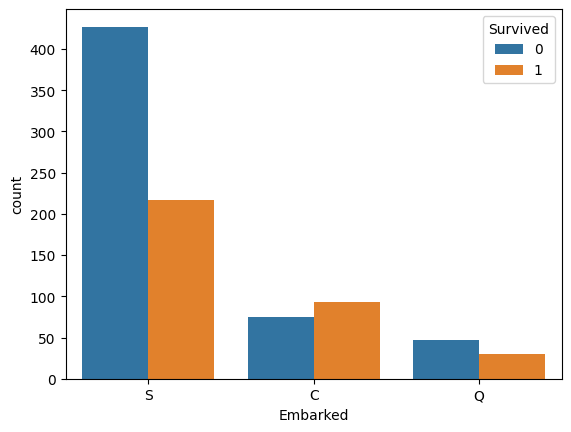

In [7]:
sns.countplot(x="Embarked", hue="Survived", data=train_data)
plt.show()

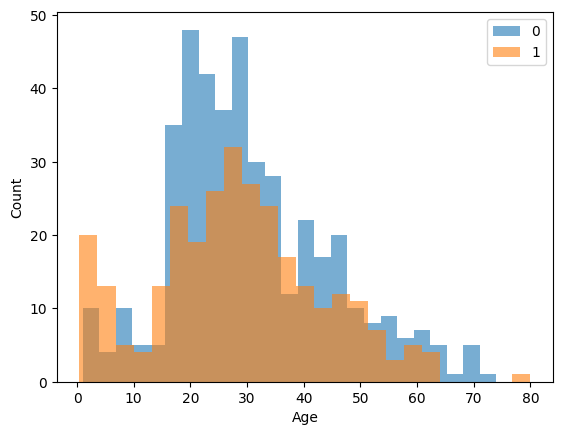

In [8]:
bins = 25
alpha = 0.6

plt.hist(train_data.loc[train_data["Survived"]==0, "Age"].dropna(), bins=bins, alpha=alpha, label="0")
plt.hist(train_data.loc[train_data["Survived"]==1, "Age"].dropna(), bins=bins, alpha=alpha, label="1")

plt.xlabel("Age")
plt.ylabel("Count")


plt.legend()
plt.show()

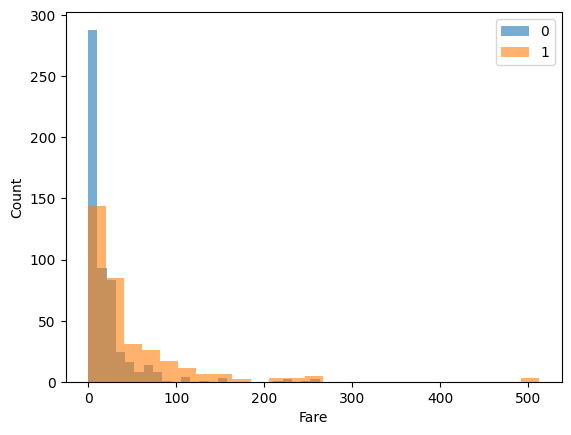

In [9]:
bins = 25
alpha = 0.6

plt.hist(train_data.loc[train_data["Survived"]==0, "Fare"].dropna(), bins=bins, alpha=alpha, label="0")
plt.hist(train_data.loc[train_data["Survived"]==1, "Fare"].dropna(), bins=bins, alpha=alpha, label="1")

plt.xlabel("Fare")
plt.ylabel("Count")

plt.legend()
plt.show()

In [10]:
data = pd.concat([train_data, test_data], sort=False)


data["Sex"].replace(["male", "female"], [0, 1], inplace=True)


data["Embarked"].fillna(("S"), inplace=True)
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Fare"].fillna(data["Fare"].mean(), inplace=True)


In [11]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [12]:
data["Family"] = data["Parch"] + data["SibSp"]

data["Family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

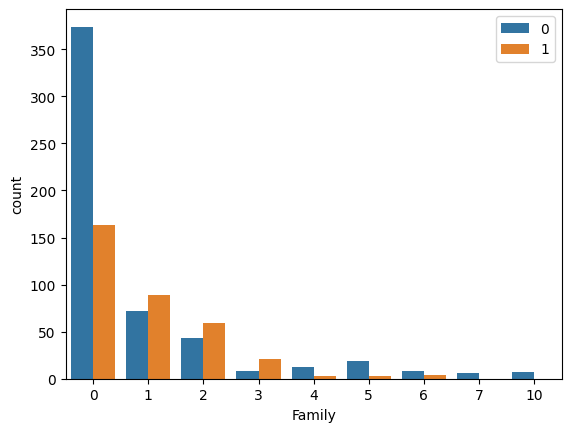

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,1,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,NaN,0,0


In [13]:
train_data["Family"] = data["Family"][:len(train_data)]
test_data["Family"] = data["Family"][len(train_data):]


sns.countplot(x="Family", data=train_data, hue="Survived")
plt.legend()
plt.show()

data

In [14]:
data.drop(["Name", "PassengerId", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)




train_data = data[:len(train_data)]
test_data = data[len(train_data):]



In [15]:
train_data["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [16]:
test_data["Family"].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  6, 10])

In [17]:
test_data = test_data.dropna(axis=1)
test_data

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,34.500000,7.8292,2,0
1,3,1,47.000000,7.0000,0,1
2,2,0,62.000000,9.6875,2,0
3,3,0,27.000000,8.6625,0,0
4,3,1,22.000000,12.2875,0,2
...,...,...,...,...,...,...
413,3,0,29.881138,8.0500,0,0
414,1,1,39.000000,108.9000,1,0
415,3,0,38.500000,7.2500,0,0
416,3,0,29.881138,8.0500,0,0


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

y = train_data["Survived"]
X = train_data.iloc[:, 1:]

y = y.round().astype(int)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
"""from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)"""

In [ ]:
"""from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)"""


'from imblearn.over_sampling import SMOTE\n\n\nsm = SMOTE(random_state=42)\nX_res, y_res = sm.fit_resample(X_train, y_train)'

In [20]:
#pip install bayesian-optimization
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00


In [21]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
import optuna
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [ ]:
"""model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    random_state = 42,
    colsample_bytree = 0.9980191649548655,
    num_leaves = 61,
    max_depth = 15,
    n_estimators = 375,
    learning_rate = 0.017312682246084524,
    reg_alpha = 0.05948821038887826,
    reg_lambda = 0.00010142197244827776,
    silent = True,
    subsample = 0.9112135020855013,
    min_child_samples = 14,
    min_child_weight = 0.011880159149015102,
    min_split_gain =  0.0003737970302571782,
    feature_fraction = 0.8920093895622677,
    bagging_fraction = 0.6687729567094691,
    bagging_freq = 6,
    scale_pos_weight = 0.5364624283733829,
    max_bin = 125,
    verbose = -1,
    class_weight = 'balanced'
)

#{'num_leaves': 61, 'max_depth': 15, 'learning_rate': 0.017312682246084524, 'n_estimators': 375, 'subsample': 0.9112135020855013,
#'colsample_bytree': 0.9980191649548655, 'reg_alpha': 0.05948821038887826, 'reg_lambda': 0.00010142197244827776, 'min_child_samples': 14, '
#min_child_weight': 0.011880159149015102, 'min_split_gain': 0.0003737970302571782, 'feature_fraction': 0.8920093895622677, '
#bagging_fraction': 0.6687729567094691, 'bagging_freq': 6, 'scale_pos_weight': 0.5364624283733829, 'max_bin': 125}


model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

print("Train:", accuracy_score(y_train, model.predict(X_train)))
print("Test:", accuracy_score(y_test, model.predict(X_test)))

print("precision train:", precision_score(y_train, model.predict(X_train)))
print("precision test:", precision_score(y_test, model.predict(X_test)))"""









              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Train: 0.9073033707865169
Test: 0.8268156424581006
precision train: 0.9316239316239316
precision test: 0.8208955223880597


In [ ]:
"""# カスタムの評価関数を定義
def custom_accuracy(y_true, y_pred):
    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
    return 'accuracy', accuracy_score(y_true, y_pred_binary), True

# モデルの学習
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=custom_accuracy,
    callbacks=[
        lgb.early_stopping(stopping_rounds=10, verbose=True),
        lgb.log_evaluation(period=1)  # 各ラウンドごとにログを表示
    ]
)"""


[1]	valid_0's binary_logloss: 0.691717	valid_0's accuracy: 0.50838
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.690328	valid_0's accuracy: 0.50838
[3]	valid_0's binary_logloss: 0.687427	valid_0's accuracy: 0.692737
[4]	valid_0's binary_logloss: 0.684747	valid_0's accuracy: 0.726257
[5]	valid_0's binary_logloss: 0.681927	valid_0's accuracy: 0.709497
[6]	valid_0's binary_logloss: 0.679111	valid_0's accuracy: 0.715084
[7]	valid_0's binary_logloss: 0.676405	valid_0's accuracy: 0.731844
[8]	valid_0's binary_logloss: 0.673794	valid_0's accuracy: 0.731844
[9]	valid_0's binary_logloss: 0.671393	valid_0's accuracy: 0.731844
[10]	valid_0's binary_logloss: 0.670242	valid_0's accuracy: 0.726257
[11]	valid_0's binary_logloss: 0.667918	valid_0's accuracy: 0.731844
[12]	valid_0's binary_logloss: 0.665486	valid_0's accuracy: 0.73743
[13]	valid_0's binary_logloss: 0.663061	valid_0's accuracy: 0.776536
[14]	valid_0's binary_logloss: 0.66088	valid_0's accur

LGBMClassifier(bagging_fraction=0.9996541607938121, bagging_freq=1,
               class_weight='balanced', colsample_bytree=0.8333122567456808,
               feature_fraction=0.8207291825935968,
               learning_rate=0.010148926608838512, max_bin=404, max_depth=5,
               min_child_samples=25, min_child_weight=0.006973932962084566,
               min_split_gain=0.014762485871157546, n_estimators=107,
               num_leaves=59, objective='binary', random_state=42,
               reg_alpha=0.8168046144896118, reg_lambda=0.0010905828216657215,
               scale_pos_weight=2.5461396338853066, silent=True,
               subsample=0.8327121854235044, verbose=-1)

In [ ]:
"""# カスタムの評価関数を定義
def custom_accuracy(y_true, y_pred):
    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
    return 'accuracy', accuracy_score(y_true, y_pred_binary), True

# 学習ラウンドを制御するためのコールバックを定義
class StopAtRound:
    def __init__(self, round_to_stop):
        self.round_to_stop = round_to_stop

    def __call__(self, env):
        if env.iteration + 1 >= self.round_to_stop:
            raise lgb.callback.EarlyStopException(env.iteration, env.evaluation_result_list)

# モデルの学習
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=custom_accuracy,
    callbacks=[
        StopAtRound(79),
        lgb.log_evaluation(period=1)  # 各ラウンドごとにログを表示
    ]
)"""


"# カスタムの評価関数を定義\ndef custom_accuracy(y_true, y_pred):\n    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]\n    return 'accuracy', accuracy_score(y_true, y_pred_binary), True\n\n# 学習ラウンドを制御するためのコールバックを定義\nclass StopAtRound:\n    def __init__(self, round_to_stop):\n        self.round_to_stop = round_to_stop\n\n    def __call__(self, env):\n        if env.iteration + 1 >= self.round_to_stop:\n            raise lgb.callback.EarlyStopException(env.iteration, env.evaluation_result_list)\n\n# モデルの学習\nmodel.fit(\n    X_train,\n    y_train,\n    eval_set=[(X_test, y_test)],\n    eval_metric=custom_accuracy,\n    callbacks=[\n        StopAtRound(79),\n        lgb.log_evaluation(period=1)  # 各ラウンドごとにログを表示\n    ]\n)"

In [ ]:
#pip install bayesian-optimization

In [ ]:


"""params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'verbose': -1,
    'random_state': 42
}

cv_result = lgb.cv(params, lgb.Dataset(X_train, label=y_train), nfold=5, metrics='binary_error', seed=42)

# 出力結果のキーを表示
print(cv_result.keys())"""



"params = {\n    'boosting_type': 'gbdt',\n    'objective': 'binary',\n    'num_leaves': 31,\n    'max_depth': -1,\n    'learning_rate': 0.1,\n    'n_estimators': 100,\n    'subsample': 1.0,\n    'colsample_bytree': 1.0,\n    'reg_alpha': 0.0,\n    'reg_lambda': 0.0,\n    'min_child_samples': 20,\n    'min_child_weight': 0.001,\n    'min_split_gain': 0.0,\n    'verbose': -1,\n    'random_state': 42\n}\n\ncv_result = lgb.cv(params, lgb.Dataset(X_train, label=y_train), nfold=5, metrics='binary_error', seed=42)\n\n# 出力結果のキーを表示\nprint(cv_result.keys())"

In [ ]:
!pip install lightgbm


In [59]:


# 目的関数の定義
def objective(trial):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'binary_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.0001, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.0001, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 30),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.001, 0.1),
        'min_split_gain': trial.suggest_loguniform('min_split_gain', 0.0001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10.0),
        'max_bin': trial.suggest_int('max_bin', 100, 500),
        'class_weight': 'balanced',
        'verbose': -1,
        'random_state': 42
    }

    # モデルの訓練
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='accuracy')

    # テストセットでの予測
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)

    return accuracy

# Optunaによるハイパーパラメータの最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 最適パラメータでのモデルの評価
best_params = study.best_params
best_model = lgb.LGBMClassifier(**best_params, boosting_type='gbdt', objective='binary', random_state=42)
best_model.fit(X_train, y_train)

print("Train:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test:", accuracy_score(y_test, best_model.predict(X_test)))
print("Precision (Train):", precision_score(y_train, best_model.predict(X_train)))
print("Precision (Test):", precision_score(y_test, best_model.predict(X_test)))

print(classification_report(y_test, best_model.predict(X_test)))
print('Best trial:', study.best_trial.params)







"""# 目的関数の定義
def objective(trial):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'binary_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.0001, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.0001, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 30),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.001, 0.1),
        'min_split_gain': trial.suggest_loguniform('min_split_gain', 0.0001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10.0),
        'max_bin': trial.suggest_int('max_bin', 100, 500),
        'class_weight': 'balanced',
        'verbose': -1,
        'random_state': 42
    }

    # クロスバリデーションの設定
    skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # モデルの訓練
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

        # テストセットでの予測
        preds = model.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        accuracies.append(accuracy)

    return np.mean(accuracies)

# Optunaによるハイパーパラメータの最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# 最適パラメータでのモデルの評価
best_params = study.best_params
best_model = lgb.LGBMClassifier(**best_params, boosting_type='gbdt', objective='binary', random_state=42)
best_model.fit(X, y)

print("Train:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test:", accuracy_score(y_test, best_model.predict(X_test)))
print("precision train:", precision_score(y_train, best_model.predict(X_train)))
print("precision test:", precision_score(y_test, best_model.predict(X_test)))

print(classification_report(y_test, best_model.predict(X_test)))
print('Best trial:', study.best_trial.params)"""














[I 2024-06-14 11:13:31,005] A new study created in memory with name: no-name-49c6acaf-4e0d-46ee-bf52-ab2d6f1b7be0
<ipython-input-59-9cc3c2446c05>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-59-9cc3c2446c05>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-59-9cc3c2446c05>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7259804761787233, colsample_bytree=0.9501854510463986 will be ignored. Current value: feature_fraction=0.7259804761787233
[LightGBM] [Warning] bagging_fraction is set=0.7221475904063769, subsample=0.9248367759775835 will be ignored. Current value: bagging_fraction=0.7221475904063769
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7259804761787233, colsample_bytree=0.9501854510463986 will be ignored. Current value: feature_fraction=0.7259804761787233
[LightGBM] [Warning] bagging_fraction is set=0.7221475904063769, subsample=0.9248367759775835 will be ignored. Current value: bagging_fraction=0.7221475904063769
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

'# 目的関数の定義\ndef objective(trial):\n    params = {\n        \'boosting_type\': \'gbdt\',\n        \'objective\': \'binary\',\n        \'metric\': \'binary_logloss\',\n        \'num_leaves\': trial.suggest_int(\'num_leaves\', 15, 63),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 5, 15),\n        \'learning_rate\': trial.suggest_loguniform(\'learning_rate\', 0.01, 0.1),\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 100, 500),\n        \'subsample\': trial.suggest_uniform(\'subsample\', 0.6, 1.0),\n        \'colsample_bytree\': trial.suggest_uniform(\'colsample_bytree\', 0.6, 1.0),\n        \'reg_alpha\': trial.suggest_loguniform(\'reg_alpha\', 0.0001, 1.0),\n        \'reg_lambda\': trial.suggest_loguniform(\'reg_lambda\', 0.0001, 1.0),\n        \'min_child_samples\': trial.suggest_int(\'min_child_samples\', 10, 30),\n        \'min_child_weight\': trial.suggest_loguniform(\'min_child_weight\', 0.001, 0.1),\n        \'min_split_gain\': trial.suggest_loguniform(\

In [60]:
pred = best_model.predict(test_data)

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7259804761787233, colsample_bytree=0.9501854510463986 will be ignored. Current value: feature_fraction=0.7259804761787233
[LightGBM] [Warning] bagging_fraction is set=0.7221475904063769, subsample=0.9248367759775835 will be ignored. Current value: bagging_fraction=0.7221475904063769


In [61]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:



result = pd.DataFrame(pred, columns=["Survived"])
result

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [63]:
combined_df = pd.concat([ID, result], axis=1)
combined_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
combined_df.to_csv("results37.csv", index=False)